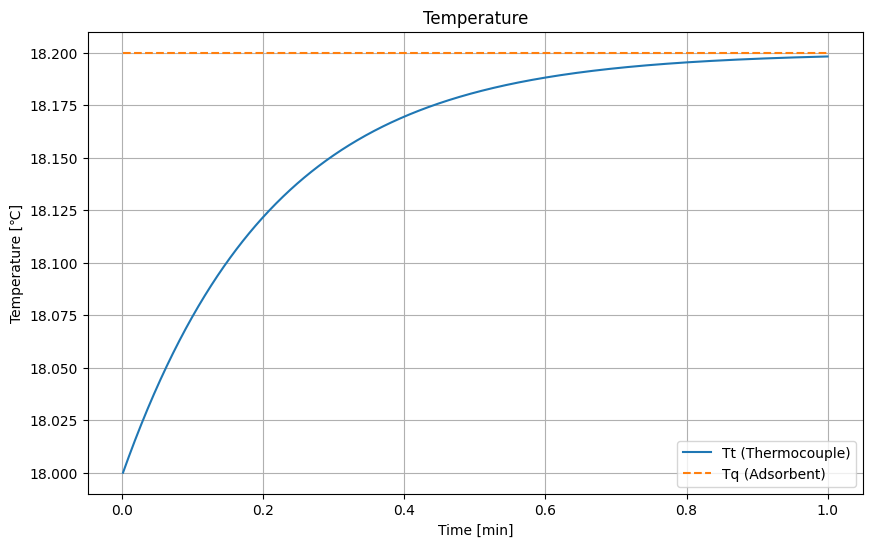

In [2]:
# 必要なライブラリのインストール
# pip install matplotlib

import matplotlib.pyplot as plt
import numpy as np

# パラメータの初期設定
dt = 0.001  # min
count = 1
count_max = 1000
time = 0
tt_now = 18  # ℃
tq_now = 18.2  # ℃
cp_t = 0.4  # J/g/K
w_t = 1  # g
d_t = 0.004  # m
l_t = 0.1  # m
h_t = 25  # W/m2/K
a_t = 1  # -

# 結果保存用のリスト
time_list = []
tt_list = []
tq_list = []

# メインの計算ループ
while count <= count_max:
    # 熱電対熱容量の算出
    cp_t = cp_t * w_t
    s_t = d_t * 3.14 * l_t
    q_t = h_t * s_t * (tq_now - tt_now) * dt * 60  # minからsecに変換
    delta_t = q_t / cp_t
    tt_next = tt_now + delta_t
    
    # 時間更新
    time = dt * count
    
    # データの保存
    time_list.append(time)
    tt_list.append(tt_now)
    tq_list.append(tq_now)
    
    # 次のステップの準備
    tt_now = tt_next
    count += 1

# グラフの描画
plt.figure(figsize=(10, 6))
plt.plot(time_list, tt_list, label='Tt (Thermocouple)')
plt.plot(time_list, [tq_now] * len(time_list), label='Tq (Adsorbent)', linestyle='--')

plt.title('Temperature')
plt.xlabel('Time [min]')
plt.ylabel('Temperature [℃]')
plt.grid(True)
plt.legend()

plt.show()